In [7]:
import os
os.chdir('./recsys2019')

In [8]:
import pandas as pd
import data
import numpy as np

In [9]:
df_train = data.train_df('full').head(1000000)

/home/giovanni/miniconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [10]:
def impr_distr(df):
    click_outs = df[df['action_type']=='clickout item']
    if len(click_outs)>0:
        impr = list(click_outs.tail(1)['impressions'].values[0].split('|'))
        last_click = click_outs.tail(1)['reference'].values
        try:
            position_last_click=impr.index(last_click)
            return position_last_click
        except ValueError:
            return -1
    else:
        return -1
            
        

In [11]:
groups = df_train.groupby(['user_id','session_id'])
temp = groups.apply(impr_distr)

In [35]:
dict={}
count = 0
for t in temp:
    if t != -1:
        count += 1
        if t not in dict:
            dict[t]=1
        else:
            dict[t]+=1

l = []
for key in sorted(dict):
    print(f'{key},  {dict[key]/count}')
    l.append(dict[key]/count)

0,  0.3773799210703629
1,  0.10206949658292425
2,  0.07178746751371642
3,  0.055443257291365865
4,  0.04710751756665704
5,  0.038213495042833764
6,  0.032149388776590626
7,  0.02824140918278949
8,  0.025738762152276447
9,  0.022889594763692366
10,  0.02238906535758976
11,  0.02040619886418327
12,  0.018134565405717586
13,  0.01619020117431899
14,  0.014515352776975647
15,  0.013052266820675715
16,  0.012705746462604677
17,  0.011569929733371835
18,  0.011743189912407354
19,  0.01072287996919819
20,  0.010183848301087688
21,  0.009798825681008759
22,  0.00858600442776013
23,  0.008682260082779863
24,  0.010299355087111368


In [41]:
sum(l[15:])

0.10734430647800558

In [16]:
import matplotlib.pyplot as plt

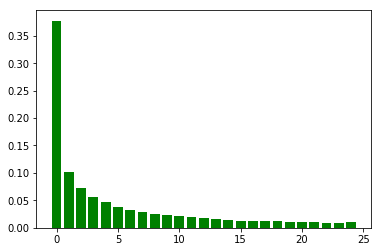

In [27]:
plt.bar(list(dict.keys()), [x / count for x in list(dict.values())], color='g')
plt.show()